# Om dette dokumentet
Denne notenook'en er ment som en introduksjon til bruk av søkealgoritmene Dijkstra's algoritme, "grådig søk" (definert under), og A*. Dokumentet inkluderer bruk av ferdige implementasjoner av disse algoritmene. Implementasjonene er de samme som de du selv skal implementere i fila weighted_graph_serach.py, og dokumentetet viser dermed flere eksempler på hvordan din egen implementasjon kan brukes.

Kodesnuttene som er inkludert i dokumentet brukes hovedsaklig for å _visualisere_ hvordan algoritmene virker. Det er ikke meningen at dere skal bruke disse kodesnuttene direkte i deres implementasjon.  

Du kan gjerne bare lese igjennom dokumentet først, uten å endre eller kjøre det med din egen kode. Men hvis du vil, kan du etterpå bruke det som utgangspunkt for å teste/debugge din egen kode. Merk likevel at du ikke trenger å levere noen modifisert versjon av dette dokumentet i innleveringa - kun weighted_graph_search.py skal endres. 

# Imports

In [1]:
from heapdict import heapdict
import numpy as np
import matplotlib.pyplot as plt

import weighted_graph_search_solution as wgs  # Change to weighted_graph_search if you are a student
import weighted_graph_tools as wgt            # See weighted_graph_tools.py in repository

# Dijkstra's algoritme

Dijkstra's algoritme er en algoritme for å finne korteste eller minst kostbare vei gjennom en vektet graf. I en vektet graf er det en vekt/kostnad/distanse assosiert med hvert kant. Et typisk eksempel er reise: Hver by tilsvarer en node i grafen, og vekten på kantene mellom nodene tilsvarer for eksempel avstand, reisetid eller billettkostnad. 

Dijktra's algoritme er veldig lik bredde-først-algoritmen som du allerede har jobbet med. I bredde-først søk utforskes alle nodene som har en lik avstand fra startnoden, før man går videre med noder som har større avstand. "Avstand" for bredde-først søk tilsvarer _antall kanter_ man må gå via for å komme mellom noden og startnoden. I _vektede_ grafer tilsvarer "avstanden" (eller "kostnaden") summen av vektene til alle kantene man må gå langs. 

Mens man i bredde-først-søk bruker en enkel kø for å bestemme rekkefølgen nodene skal utforskes i, bruker Dijkstra's algoritme en _prioritetskø_. Nodene som har kort avstand/kostnad fra startnoden hentes først ut av køen. Algortimen utforsker dermed grafen langs veiene som har lavest kostnad. Dette gir algortmen den egenskapen at når en node hentes ut av køen, vet vi at vi har funnet den korteste veien til noden. 

Når algoritmen utforsker en graf, er det imidlertid mulig at den oppdager nye veier til en node som har lavere kostnad enn veiene den har oppdaget tidligere. Hvis algortimen oppdager dette, må den _oppdatere_ sitt estimat for distanse til noden, og også oppdatere hvilken vei i grafen den lavere distansen tilsvarer. Dette betyr at for hver nye node som besøkes, må man sjekke naboene: Er kostnaden til naboen via noden man "står i" lavere enn den laveste kostnaden man har funnet tidligere? I så fall må man oppdatere kostnaden, og si at korteste vei går _via_ noden man står i. Man trenger imidlertid ikke sjekke naboer som er "ferdig besøkt" - der vet man allerede at man har funnet korteste vei.

Om alt dette høres ganske forvirrende ut, vil det antakelig gi mer mening når man ser pseudokoden til algoritmen, og også ser noen eksempler på hvordan den fungerer. 

__Se gjerne video med introduksjon til Dijkstra's algoritme på papir (på Canvas) før du leser videre.__


## Dijkstra's algoritme - pseudokode

<pre>
    dijkstra_traverse(graph, start_node):
        let dist equal a new dict
        let frontier equal a new priority queue (here: heapdict)
        let came_from equal a new dict
        let visited equal a new list

        for every node except start node: let dist[node] equal infinity (or a very large number)
        let dist[start_node] equal 0
        add start_node to frontier with priority 0
        set came_from[start_node] to None
        
        while frontier is not empty:
            pop next node from frontier and let it equal current_node
            add current_node to visited

            for every neighbor of current_node:
                if the neighbor has not been visited: 
                    let dist_via_current equal the distance to the neighbor via current_node
                    if dist_via_current is smaller than dist[neighbor]:
                        set dist[neighbor] equal to dist_via_current
                        set came_from[neighbor] equal to current_node
                        add/update the neighbor in frontier and set priority equal to dist_via_current

        return dist, came_from
</pre>

I pseudokoden over brukes 4 datastrukturer av algortmen:
- "dist": Denne strukturen inneholder en oversikt over _estimert_ distanse/kostnad til hver node. Før algoritmen begynner, settes kostnaden til startnoden lik null, og kostnaden til alle andre noder lik "uendelig" (eller et veldig stort tall). Etter hvert som algortimen traverserer grafen, kan estimatet oppdateres (hvis man finner mindre kostbare veier til nodene).
- "frontier": Dette er prioritetskøen som bestemmer rekkefølgen nodene hentes ut i. Prioriteten til hver node settes lik estimert kostnad til noden. Hvis man senere oppdaterer kostnaden til en node i dist, må også frontier oppdateres tilsvarende.
- "came_from": Denne strukturen angir hvilken node man kommer fra når man går den minst kostbare veien. Denne brukes på samme måte som i bredde-først søk.
- "visited" er en liste over alle besøkte noder. Bruk av denne datastrukturen gjør at man unngår mange unødvendige sjekker av nabonoder (man trenger ikke oppdatere kostnaden til ferdig besøkte noder).

Merk at ulike implementasjoner av prioritetskø gir opphav til litt ulike versjoner av Dijkstra's algoritme. Noen prioritetskøer (for eksempel [queue.PriorityQueue](https://docs.python.org/3/library/queue.html#queue.PriorityQueue)) tillater ikke at man oppdaterer prioriteten til et element som allerede er lagt inn i køen. Man vil da legge inn samme node i køen på nytt (en "duplikat") med ny prioritet. Vi skal imidlertid bruke [heapdict](https://pypi.org/project/HeapDict/) til prioritetskø, og den tillater oppdatering av prioritet i køen, som vist under:

In [2]:
# Demonstrate updating priority of existing element in priority queue
queue = heapdict()
print(f'Empty queue: {[item for item in queue.items()]}')
queue['A'] = 3   # Adding a new key-value pair
queue['B'] = 5   # Adding a new key-value pair
print(f'Queue with two elements: {[item for item in queue.items()]}')
queue['B'] = 1   # Changing priority of existing key
print(f'Modified queue with two elements: {[item for item in queue.items()]}')

Empty queue: []
Queue with two elements: [('A', 3), ('B', 5)]
Modified queue with two elements: [('A', 3), ('B', 1)]


## Bruk av Dijkstra's algoritme for traversering av rutenett
I kodecellen under leser vi inn et rutenett som ligner mye på rutenettene du jobbet med i bredde-først søk. Forskjellen er at i steden for kun å ha åpne rom ("."), har hver rute en vekt mellom 1 og 9. Dette tilsvarer vekten på kanten for å bevege seg _inn_ i ruta. Vegger er fortsatt kodet som "#".

In [3]:
# Import maze text
maze_text = wgt.read_maze_text('mazes/maze_3x3_weighted.txt')
for line in maze_text:
    print(line)


#####
#157#
#2#9#
#132#
#####


Vi kan visualisere dette rutenettet med et par hjelpefunksjoner. Vekten til hver rute indikeres både med fargekoding og med tall.

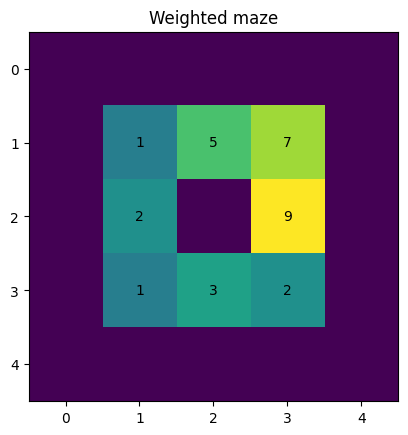

In [4]:
# Visualize maze as matrix
grid = wgt.maze_text_to_matrix(maze_text)
im = wgt.visualize_weighted_maze(grid)
plt.title('Weighted maze')
plt.show()

Når vi skal representere grafen for algortimen, bruker vi (som tidligere) en "adjacency list" som er en nøstet dictionary. Her ser vi for eksempel at øverste venstre hjørne (node (1,1)) har to naboer: Noden (2,1) under, med kantvekt 2, og node (1,2) til høyre, med kantvekt 5.

In [5]:
# Show adjacency list
graph = wgt.maze_text_to_graph(maze_text)
for node,neighbors in graph.items():
    print(f'{node}: {neighbors}')

(1, 1): {(2, 1): 2, (1, 2): 5}
(1, 2): {(1, 1): 1, (1, 3): 7}
(1, 3): {(2, 3): 9, (1, 2): 5}
(2, 1): {(1, 1): 1, (3, 1): 1}
(2, 3): {(1, 3): 7, (3, 3): 2}
(3, 1): {(2, 1): 2, (3, 2): 3}
(3, 2): {(3, 1): 1, (3, 3): 2}
(3, 3): {(2, 3): 9, (3, 2): 3}


Din første oppgave i innleveringen er å implementere Dijkstra's algoritme. Vi kan demonstrere algortmen på vår enkle graf. Algortimen returnerer to datastrukturer: "dist", som er en dictionary som inneholder kosteste vei / laveste kostnad til hver node, og "came from" som viser "forrige node" langs den korteste veien.

In [6]:
start_node = (1,1)
dist, came_from = wgs.dijkstra_traverse(graph,start_node=(1,1))

for node,cost in dist.items():
    print(f'Shortest distance from {start_node} to {node}: {cost}')

print('')
for to_node, from_node in came_from.items():
    print(f'Came to node {to_node} from {from_node}') 

print(dist)
print(came_from)

Shortest distance from (1, 1) to (1, 1): 0
Shortest distance from (1, 1) to (1, 2): 5
Shortest distance from (1, 1) to (1, 3): 12
Shortest distance from (1, 1) to (2, 1): 2
Shortest distance from (1, 1) to (2, 3): 17
Shortest distance from (1, 1) to (3, 1): 3
Shortest distance from (1, 1) to (3, 2): 6
Shortest distance from (1, 1) to (3, 3): 8

Came to node (1, 1) from None
Came to node (2, 1) from (1, 1)
Came to node (1, 2) from (1, 1)
Came to node (3, 1) from (2, 1)
Came to node (3, 2) from (3, 1)
Came to node (1, 3) from (1, 2)
Came to node (3, 3) from (3, 2)
Came to node (2, 3) from (3, 3)
{(1, 1): 0, (1, 2): 5, (1, 3): 12, (2, 1): 2, (2, 3): 17, (3, 1): 3, (3, 2): 6, (3, 3): 8}
{(1, 1): None, (2, 1): (1, 1), (1, 2): (1, 1), (3, 1): (2, 1), (3, 2): (3, 1), (1, 3): (1, 2), (3, 3): (3, 2), (2, 3): (3, 3)}


Vi kan visualisere dette ved å plotte den korteste distansen til hver node, og å plotte piler som viser came_from. Vi gjentar også plottet av vektene til hver node som vi viste over, slik at at de to kan sammenlignes side om side:

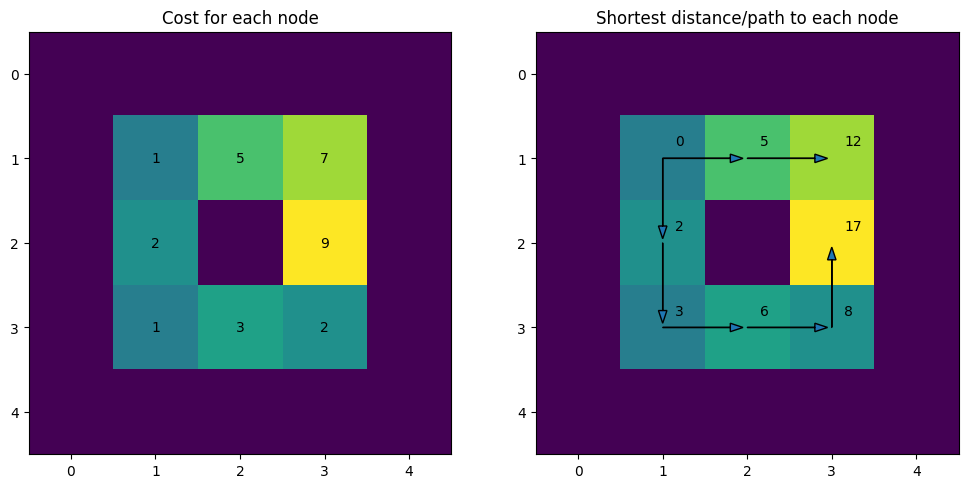

In [7]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
plt.sca(ax[0])
wgt.visualize_weighted_maze(grid)
plt.title('Cost for each node')
plt.sca(ax[1])
plt.imshow(grid)
for ((row_ind,col_ind),node_dist) in dist.items():
    plt.text(col_ind+0.15,row_ind-0.15,str(node_dist)) 
 
wgt.plot_came_from(came_from)

plt.title('Shortest distance/path to each node')
plt.show()

I plottene over kan vi for eksempel se at korteste vei fra node (1,1) til node (2,3) går mot klokka, via nodene (2,1), (3,1), (3,2) og (3,3). Legg merke til at dette ikke er korteste vei i antall kanter (antall "hopp"), men at det er korteste vei i form av lavest sum av kantvekter. For node (2,3) blir denne summen 2+1+3+2+9, altså 17. Hvis man hadde gått med klokka, ville summen vært 5+7+9=21, altså ikke korteste vei.

Vi kan gjøre tilsvarende i en litt større graf også:

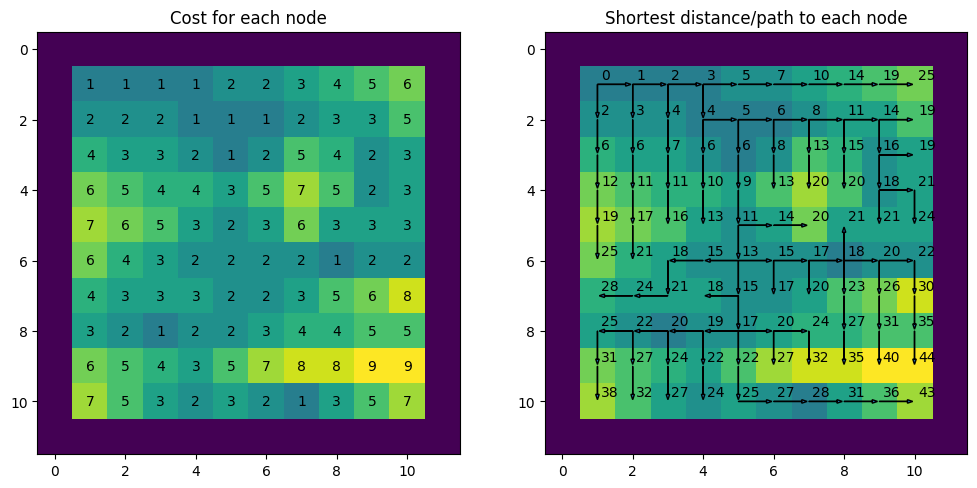

In [8]:
maze_text = wgt.read_maze_text('mazes/maze_10x10_weighted.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)
start_node = (1,1)
dist, came_from = wgs.dijkstra_traverse(graph,start_node=(1,1))

fig, ax = plt.subplots(ncols=2,figsize=(12,6))
plt.sca(ax[0])
wgt.visualize_weighted_maze(grid)
plt.title('Cost for each node')
plt.sca(ax[1])
plt.imshow(grid)
for ((row_ind,col_ind),node_dist) in dist.items():
    plt.text(col_ind+0.1,row_ind-0.15,str(node_dist)) 
 
wgt.plot_came_from(came_from)

plt.title('Shortest distance/path to each node')
plt.show()

Pilene (basert på came_from) utgjør et slags "tre" som starter i node (0,0) og som har mange "greiner" som tilsvarer korteste veier til de ulike nodene. Legg merke til hvordan korteste vei ofte går rundt områder som har høy vekt (f.eks. fram til node (7,1) eller (5,8)).

# Søk i grafer ved bruk av Dijkstras algoritme og "early exit"

Den originale versjonen av Dijkstra's algoritme traverserer hele grafen og finner korteste vei til _alle_ noder. Hvis vi kun er interesserte i korteste vei til en spesifikk sluttnode, kan vi stoppe algortimen når vi har besøkt denne noden (når noden er hentet ut av prioritetskøen). Siden vi vet at vi da allerede har funnet korteste vei til sluttnoden, har det ingen hensikt å fortsette traverseringen for å besøke alle nodene.

I pseudokoden under konstruerer vi den korteste veien fra startnoden til sluttnoden (liste med alle nodene fra start til slutt) basert på informasjonen i came_from. Linjene som er nye/annerledes sammenlignet med dijkstra_traverse() er markert med gult.

<pre>
    dijkstra_search(graph, start_node, end_node):
        let dist equal a new dict
        let frontier equal a new priority queue (here: heapdict)
        let came_from equal a new dict
        let visited equal a new list

        for every node except start node: let dist[node] equal infinity (or a very large number)
        let dist[start_node] equal 0
        add start_node to frontier with priority 0
        set came_from[start_node] to None
        
        while frontier is not empty:
            pop next node from frontier and let it equal current_node
            add current_node to visited

            <mark>if current_node is equal to end_node:</mark>
                <mark>exit while loop</mark>

            for every neighbor of current_node:
                if the neighbor has not been visited: 
                    let dist_via_current equal the distance to the neighbor via current_node
                    if dist_via_current is smaller than dist[neighbor]:
                        set dist[neighbor] equal to dist_via_current
                        set came_from[neighbor] equal to current_node
                        add/update the neighbor in frontier and set priority equal to dist_via_current

        <mark>construct path from start_node to end_node based on came_from </mark>
        <mark>return dist[end_node], came_from, visited, path from start_node to end_node</mark>
</pre>

Vi kan demonstrere hvordan algoritmen fungerer i en faktisk graf. 

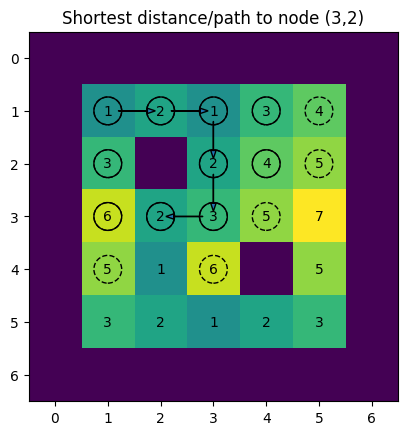

10
15
10
[(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2)]


In [9]:
# Demonstrate Dijkstra search, show path and visited/discovered nodes
maze_text = wgt.read_maze_text('mazes/maze_5x5_weighted.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)

start_node = (1,1)
dist, came_from, visited, path = wgs.dijkstra_search(graph,start_node=(1,1),end_node=(3,2))

wgt.visualize_weighted_maze(grid)
wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')

plt.title('Shortest distance/path to node (3,2)')
plt.show()

print(dist)
print(len(came_from))
print(len(visited))
print(path)

I eksempelet over indikerer tallene vekten til hver rute. Nodene som har blitt besøkt (dvs. de ligger i "visited"-lista) er indikert med en heltrukken sirkel. Nodene som har blitt oppdaget, men ikke ennå har blitt besøkt, er indikert med en stiplet sirkel (koden tegner egentlig alle nodene i came_from, men kun de som ikke er del av visited vises som stiplede sirkler). Pilene indikerer korteste vei fra (1,1) til (3,2). 

Legg merke til at noen av nodene ikke ble oppdaget før algoritmen stoppet, og at enda færre faktisk ble besøkt. Vi kan likevel være sikre på at vi har funnet korteste vei. Dette gjør algoritmen mer _effektiv_ - vi bruker ikke tid og ressurser på å utforske noder som ikke er relevante.

## Dijkstra søker "blindt" og besøker (unødvendig) mange noder
Dijkstra fungerer godt for å finne korteste vei til en node, men algoritmen utforsker grafen på en "blind" måte. Utforskingen av grafen skjer først langs stiene i grafen med lav kostnad. Den har ingen idé om hvorvidt den nærmer seg sluttnoden eller ikke - den bare stopper når den finner den. En konsekvens av dette er at algoritmen potensielt utforsker store og irrelevante "billige" deler av grafen før den til slutt finner sluttnoden.

Vi kan demonstrere dette ved å se på et veldig enkelt rutenett, der alle rutene har lik vekt. Algoritmen starter i node (5,5) og skal finne node (8,8).

69 nodes have been visited


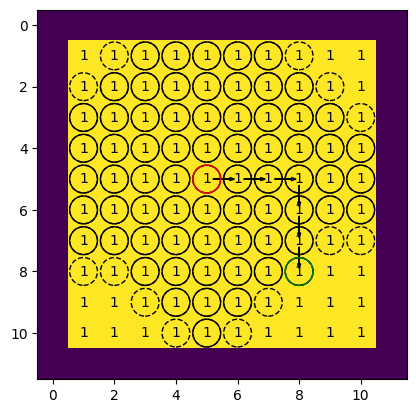

In [10]:
# Demonstrate Dijkstra in maze with uniform cost
maze_text = wgt.read_maze_text('mazes/maze_10x10_uniform_cost.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)
dist, came_from, visited, path = wgs.dijkstra_search(graph,start_node=(5,5),end_node=(8,8))

wgt.visualize_weighted_maze(grid)

wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(8,8)],edgecolors='green')
print(f'{len(visited)} nodes have been visited')

Vi kan se at algoritmen har utforsket noder i alle retninger ut fra startnoden (5,5) - både oppover, nedover, høyre og venstre. Til sammen har 69 av nodene blitt besøkt. Hvis algoritmen på en eller annen måte kunne vite at den burde utforske nodene nedover og til høyre først, kunne den potensielt ha funnet den korteste veien uten å besøke så mange noder. 

Vi skal nå se på en algortime som _kun_ bryr seg om å komme nærmere målet, og ikke egentlig bryr seg om å finne den korteste (dvs. den minst kostbare) veien. Den har ikke noe offisielt navn, men vi kaller den "grådig søk" her.  

# Grådig søk
Grådig søk bruker en såkalt "[heuristikk](https://en.wikipedia.org/wiki/Heuristic_(computer_science))" for å finne ut hvilke noder som er nærmest målet. I vår tilfelle er denne heuristikken såkalt "[Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)" fra en node til sluttnoden. Dette kalles også "L1-avstand". 

### L1-avstand
For to koordinater $(y_1,x_1)$ og $(y_2,x_2)$ i et todimensjonalt rom er den definert som 

$$ d_{L1}(y_1,x_1,y_2,x_2) = |y_2-y_1| + |x_2-x_1|$$

Distansen er altså summen av forskjellen i posisjon langs x-aksen og langs y-aksen (med absoluttverdier). Vi kan vise dette med et enkelt eksempel:

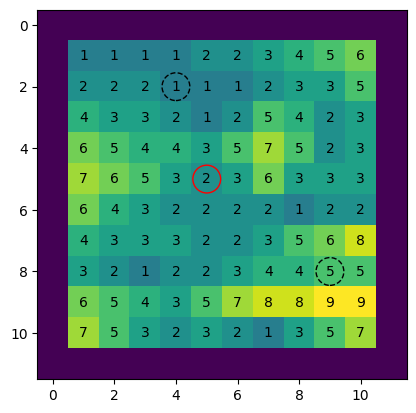

In [11]:
maze_text = wgt.read_maze_text('mazes/maze_10x10_weighted.txt')
grid = wgt.maze_text_to_matrix(maze_text)
wgt.visualize_weighted_maze(grid)
node = (5,5)
end_node_1 = (2,4)
end_node_2 = (8,9)
wgt.plot_node_circles([node],edgecolors='red')
wgt.plot_node_circles([end_node_1,end_node_2],linestyle='--')


L1-distansen fra node (5,5) til node (2,4) er gitt ved
$$d_{L1}(5,5,2,4) = |2-5| + |4-5| = 3 + 1 = 4$$
Tilsvarende, L1-distansen fra node (5,5) til node (8,9) er gitt ved
$$d_{L1}(5,5,8,9) = |8-5| + |9-5| = 3 + 4 = 7$$

Vær obs på at denne L1-distansen **_ikke_** er det samme som kostnaden for å bevege seg mellom disse nodene. Hvis man for eksempel skulle gå langs minst kostbare vei fra node (5,5) til node (2,4), tilsvarer det en kostnad på 3+1+1+1 = 6, som er større enn L1-distansen på 4. 

Grunnen til at vi bruker heuristikken L1-distanse er at denne er enkel å beregne, selv for noder som ligger langt fra hverandre i grafen. L1-distansen kan gi oss et hint om hvilken retning vi burde utforske grafen i for å komme nærmere målet. 

Pseudokoden under beskriver "grådig søk". Algoritmen ligner på Dijkstra med at den bruker en prioritetskø for å bestemme rekkefølgen nodene skal utforskes i. Hovedforskjellen er at grådig søk bruker L1-distanse som prioritet i køen.


## Grådig søk - pseudokode

<pre>
    greedy_search(graph, start_node, end_node):
        let frontier equal a new priority queue (here: heapdict)
        let came_from equal a new dict
        let visited equal a new list

        add start_node to frontier with priority 0
        set came_from[start_node] to None
        
        while frontier is not empty:
            remove a node from frontier and let it equal current_node
            add current_node to visited

            if current_node is equal to end_node:
                exit while loop

            for every neighbor of current_node:
                if the neighbor has not been visited and is not in frontier:
                    set came_from[neighbor] equal to current_node
                    <mark>let d_L1 equal L1-distance between the neighbor and end_node</mark>
                    <mark>add the neighbor to frontier and set priority equal d_L1</mark>

        construct path from start_node to end_node based on came_from
        <mark>let total_dist equal summed cost along path</mark> 
        <mark>return total_dist, came_from, visited, path </mark>
</pre>

I implementasjonen over vil algoritmen hele tiden hente ut nodene som ligger nærmest sluttnoden (målt i L1-distanse). På denne måte "guides" algoritmen nærmere målet. 

Merk at i vår "verden" av 2D rutenett er L1-distanse en nyttig heuristikk. I andre tilfeller der grafer brukes vil det ikke være mulig (eller gi mening) å bruke fysisk distanse som heuristikk, men andre heuristikker kan være nyttige. Heuristikken vil være spesifikk for hvert enkelt bruksområde. 

## Grådig søk - eksempler på bruk
I eksempelet under viser vi bruk av grådig søk i et enkelt rutenett der alle rutene har samme vekt (1). Startnoden og sluttnoden er den samme som i eksempelet med Dijkstra over.

7 nodes have been visited


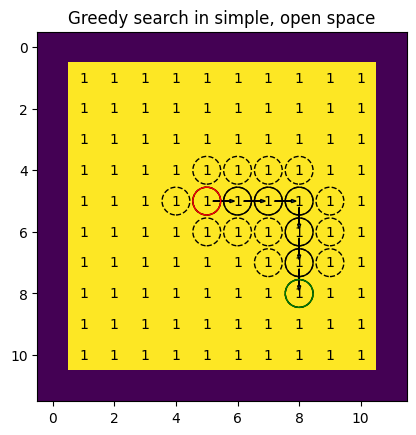

In [12]:
# Demonstrate greedy search in maze with uniform cost
maze_text = wgt.read_maze_text('mazes/maze_10x10_uniform_cost.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)
dist, came_from, visited, path = wgs.greedy_search(graph,start_node=(5,5),end_node=(8,8))

wgt.visualize_weighted_maze(grid)
plt.title('Greedy search in simple, open space')
wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(8,8)],edgecolors='green')
print(f'{len(visited)} nodes have been visited')

Wow! Algoritmen finner veien til sluttnoden, og besøker kun 7 noder på veien! Totalt 19 noder blir oppdaget. Dette er mye mindre enn det vi så for Dijkstra i eksempelet over. Men grådig søk er heller ikke perfekt. Hva skjer hvis vi introduserer en hindring slik at algoritmen ikke kan gå like direkte til sluttnoden?

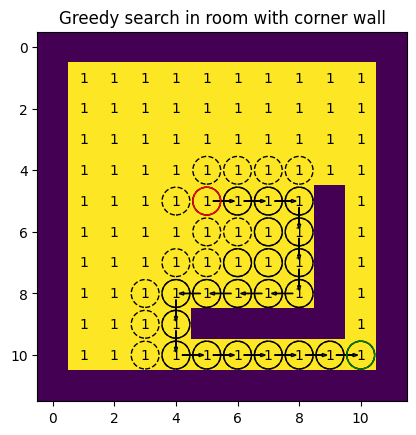

In [13]:
# Demonstrate greedy search in maze with corner wall
maze_text = wgt.read_maze_text('mazes/maze_10x10_corner_wall.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)
dist, came_from, visited, path = wgs.greedy_search(graph,start_node=(5,5),end_node=(10,10))

wgt.visualize_weighted_maze(grid)
plt.title('Greedy search in room with corner wall')
wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(10,10)],edgecolors='green')

Algoritmen forsøker å besøke nodene som reduserer L1-avstanden. Når den når fram til veggen, går den nedover mot hjørnet, siden dette bringer den næmere sluttnoden. Men dette er en blindvei. Etter å ha nådd hjørnet utforsker algoritmen så de neste nodene i køen (dvs. noder som har større L1-avstand enn innerst i hjøret). Til slutt finner den at den kan gå "rundt kanten" og etterhvert nå målet. 

Vi kan merke oss at algoritmen finner en vei fra starten til målet, men _veien er ikke nødvendigvis den korteste veien!_

Noen ganger kan det være akseptabelt å ikke finne den korteste veien - man er bare ute etter å finne "en eller annen vei" uten å bruke så mange ressurser på å søke. Da kan et grådig søk være OK. I andre tilfeller er det viktig å ha en garanti for å finne korteste vei - da er grådig søk et dårlig alternativ.

Vi tar med et eksempel til, der vi erstatter "veggen" i eksempelet over med et sett med "dyre" noder (vekt 9):

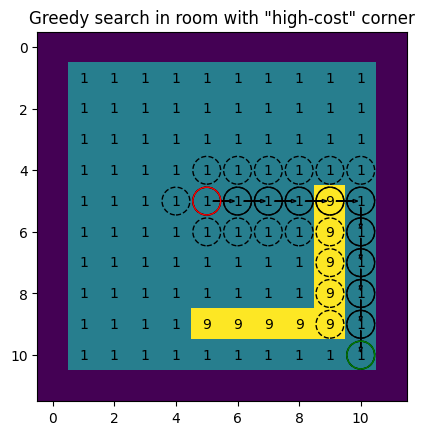

In [14]:
# Demonstrate greedy search in maze with "high-cost" corner 
maze_text = wgt.read_maze_text('mazes/maze_10x10_corner.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)
dist, came_from, visited, path = wgs.greedy_search(graph,start_node=(5,5),end_node=(10,10))

wgt.visualize_weighted_maze(grid)
plt.title('Greedy search in room with "high-cost" corner')
wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(10,10)],edgecolors='green')

Vi ser at algoritmen finner en av de mest direkte veiene til målet - men den bryr seg ikke om hva kostnaden blir. Det ville ha vært billigere å gå rundt "veggen" med vekt 9 - det ville gitt en total kostnad på 12. Den grådige algoritmen går rett igjennom, med en total kostnad på 18. Igjen - algoritmen finner en mulig vei gjennom grafen, men ikke minst kostbare vei. 

# A* - en smart kombinasjon av Dijkstra og grådig søk
[A*](https://en.wikipedia.org/wiki/A*_search_algorithm) er en algoritme for søk i grafer som ble utviklet som del "[Shakey"-prosjektet](https://en.wikipedia.org/wiki/Shakey_the_robot). Målet med prosjektet var å utvikle en robot ("Shakey") som kunne planlegge egne handlinger for å nå et mål. Shakey's fysiske omgivelser ble modellert som en graf, og man prøvde å finne gode algoritmer for å bevege seg gjennom grafen. 

En av de første algoritmene som ble foreslått het rett og slett bare "Algoritme A". Senere ble denne modifisert, og utviklerne av algoritmen så for seg at denne måtte være optimal. Den nye algoritmen fikk navnet "A*", der stjernen skulle indikere noe optimalt eller bra (se artikkel ["A* search - what's in a name?](https://web.cse.ohio-state.edu/~davis.1719/Publications/Astar-CACM.pdf)"). Senere ble det bevist at A* faktisk _er_ optimal, under visse omstendigheter. 

Navnet A* er altså ganske tilfeldig valgt, men har blitt stående. Algoritmen har inspirert en hel familie av grafalgoritmer, med navn som "B*", "D*" osv. (se [artikkel](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=831ff239ba77b2a8eaed473ffbfa22d61b7f5d19) om "stjerne-algoritmene"). 

Vi har sett at Dijkstra-algoritmen bruker avstand eller kostnad fra startnoden for å prioritere hvilke noder som skal besøkes, mens grådig søk bruker en heuristikk (i vår tilfelle L1-avstand til sluttnoden) for å prioritere. Idéen bak A* er å bruke _begge disse samtidig_.

Vi kan prøve å visualisere disse to for grafen vi så over. Først kjører vi en Dijkstra-traersering for å finne avstand / kostnad fra startnoden til alle andre noder, og plotte dette. Deretter plotter vi L1-avstand til sluttnoden for alle noder. Til slutt plotter vi _summen av disse_:

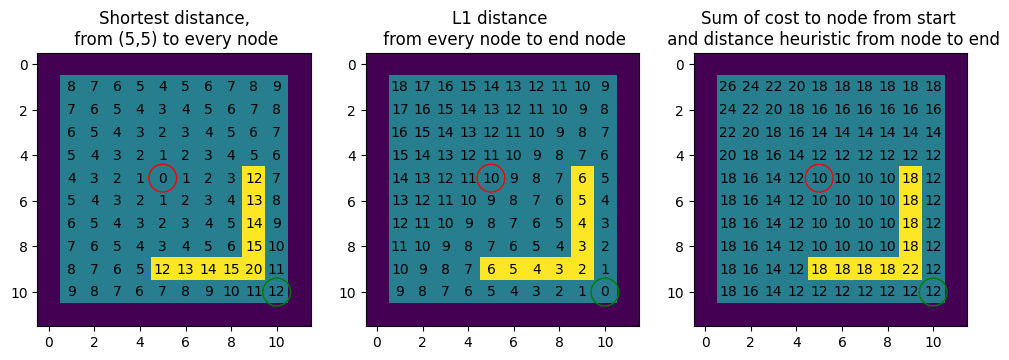

In [15]:
maze_text = wgt.read_maze_text('mazes/maze_10x10_corner.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)
dist, came_from = wgs.dijkstra_traverse(graph,start_node=(5,5))
end_node = (10,10)

fig, ax = plt.subplots(ncols=3,figsize=(12,6))
plt.sca(ax[0])

plt.imshow(grid)
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(10,10)],edgecolors='green')
for ((row_ind,col_ind),node_dist) in dist.items():
    plt.text(col_ind,row_ind,str(node_dist),
        horizontalalignment='center',verticalalignment='center')  
plt.title('Shortest distance,\n from (5,5) to every node')

plt.sca(ax[1])
plt.imshow(grid)
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(10,10)],edgecolors='green')
for ((row_ind,col_ind),node_dist) in dist.items():
    plt.text(col_ind,row_ind,str(wgs.distance_L1((row_ind,col_ind),end_node)),
        horizontalalignment='center',verticalalignment='center')  
plt.title('L1 distance \n from every node to end node')

plt.sca(ax[2])
plt.imshow(grid)
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(10,10)],edgecolors='green')
for ((row_ind,col_ind),node_dist) in dist.items():
    plt.text(col_ind,row_ind,str(node_dist + wgs.distance_L1((row_ind,col_ind),end_node)),
        horizontalalignment='center',verticalalignment='center')  
plt.title('Sum of cost to node from start \n and distance heuristic from node to end')

plt.show()

A* er altså en variant av Dijkstra's algoritme der vi bruker summen av kostnaden fra start sammen med en slags "estimert kostnad til slutt" (heuristikken) for å prioritere rekkefølgen nodene utforskes i. Her er pseudokoden:

## A* - pseudokode
<pre>
    astar(graph, start_node, end_node):
        let dist equal a new dict
        let frontier equal a new priority queue (here: heapdict)
        let came_from equal a new dict
        let visited equal a new list

        for every node except start node: let dist[node] equal infinity (or a very large number)
        let dist[start_node] equal 0
        add start_node to frontier with priority 0
        set came_from[start_node] to None
        
        while frontier is not empty:
            remove a node from frontier and let it equal current_node
            add current_node to visited

            if current_node is equal to end_node:
                exit while loop

            for every neighbor of current_node:
                if the neighbor has not been visited: 
                    let dist_via_current equal the distance to the neighbor via current_node
                    if dist_via_current is smaller than dist[neighbor]:
                        set dist[neighbor] equal to dist_via_current
                        set came_from[neighbor] equal to current_node
                        let neighbor_pri equal dist_via_current plus L1 distance from neighbor to end node
                        add/update the neighbor in frontier and set priority equal neighbor_pri

        construct path from start_node to end_node based on came_from
        return dist[end_node], came_from, visited, path from start_node to end_node
</pre>

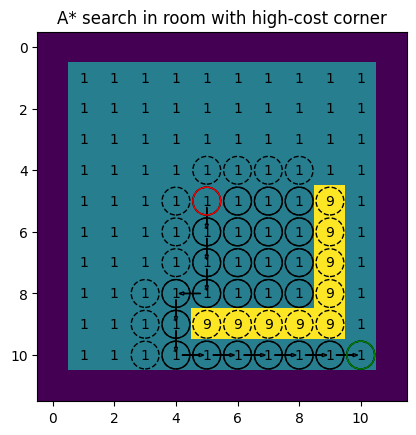

In [16]:
# Demonstrate A* on example with "high-cost corner"
maze_text = wgt.read_maze_text('mazes/maze_10x10_corner.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)

total_dist, came_from, visited, path = wgs.astar(graph,(5,5),(10,10))
wgt.visualize_weighted_maze(grid)
plt.title('A* search in room with high-cost corner')
wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')
wgt.plot_node_circles([(5,5)],edgecolors='red')
wgt.plot_node_circles([(10,10)],edgecolors='green')

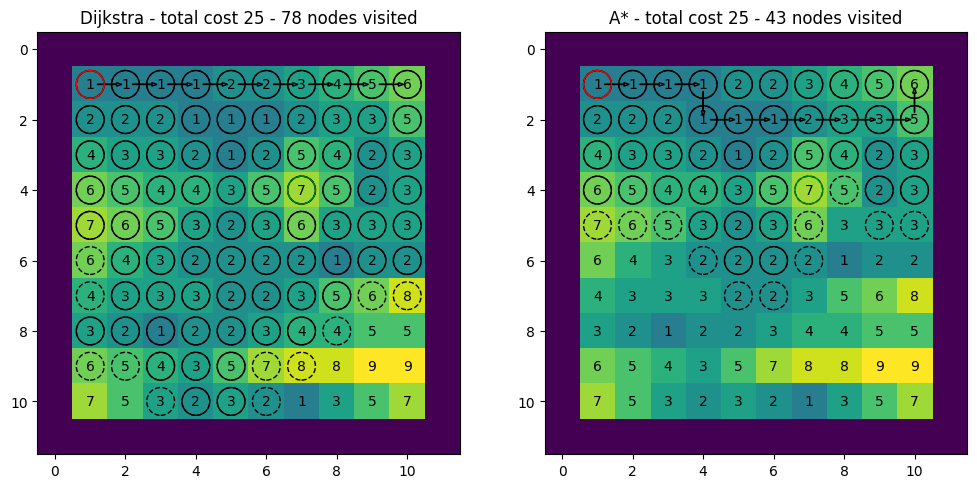

In [17]:
# Compare Dijkstra and A* on example with many different weights
maze_text = wgt.read_maze_text('mazes/maze_10x10_weighted.txt')
grid = wgt.maze_text_to_matrix(maze_text)
graph = wgt.maze_text_to_graph(maze_text)

fig, ax = plt.subplots(ncols=2,figsize=(12,6))

plt.sca(ax[0])
total_dist, came_from, visited, path = wgs.dijkstra_search(graph,(1,1),(1,10))
wgt.visualize_weighted_maze(grid)
wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')
wgt.plot_node_circles([(1,1)],edgecolors='red')
wgt.plot_node_circles([(4,7)],edgecolors='green')
plt.title(f'Dijkstra - total cost {total_dist} - {len(visited)} nodes visited')

plt.sca(ax[1])
total_dist, came_from, visited, path = wgs.astar(graph,(1,1),(1,10))
wgt.visualize_weighted_maze(grid)
wgt.plot_path(path)
wgt.plot_node_circles(visited)
wgt.plot_node_circles(came_from,linestyle='--')
wgt.plot_node_circles([(1,1)],edgecolors='red')
wgt.plot_node_circles([(4,7)],edgecolors='green')
plt.title(f'A* - total cost {total_dist} - {len(visited)} nodes visited')
plt.show()